<a href="https://colab.research.google.com/github/datasci-shreya/Python-Class-Assignment/blob/main/Trader_Performance_vs_Market_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can mount your Google Drive by running the following code cell. This will prompt you to authorize Google Colab to access your Drive files.

In [138]:
import pandas as pd

sentiment = pd.read_csv("fear_greed_index (2).csv")
trades = pd.read_csv("historical_data (2).csv")


In [139]:
print(sentiment.head())
print(trades.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [140]:
print("Sentiment data:")
print(sentiment.head())
print(sentiment.shape)

print("\nTrades data:")
print(trades.head())
print(trades.shape)


Sentiment data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
(2644, 4)

Trades data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       

In [141]:
print(sentiment.columns)
print(trades.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [142]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
trades['date'] = pd.to_datetime(trades['date']).dt.date

In [143]:
data = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

data.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [144]:
print(data[['date', 'classification']].head(10))
print(data['classification'].value_counts())


         date classification
0  2024-02-12          Greed
1  2024-02-12          Greed
2  2024-02-12          Greed
3  2024-02-12          Greed
4  2024-02-12          Greed
5  2024-02-12          Greed
6  2024-02-12          Greed
7  2024-02-12          Greed
8  2024-02-12          Greed
9  2024-02-12          Greed
classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


In [145]:
data['win'] = data['Closed PnL'] > 0
avg_pnl = data.groupby('classification')['Closed PnL'].mean()
win_rate = data.groupby('classification')['win'].mean()
trade_count = data.groupby('classification').size()
avg_pnl, win_rate, trade_count


(classification
 Extreme Fear       1.891632
 Extreme Greed    205.816345
 Fear             128.287950
 Greed             53.988003
 Neutral           27.088803
 Name: Closed PnL, dtype: float64,
 classification
 Extreme Fear     0.292777
 Extreme Greed    0.553282
 Fear             0.381787
 Greed            0.435707
 Neutral          0.494920
 Name: win, dtype: float64,
 classification
 Extreme Fear      2326
 Extreme Greed     5621
 Fear             13869
 Greed            11292
 Neutral           2756
 dtype: int64)

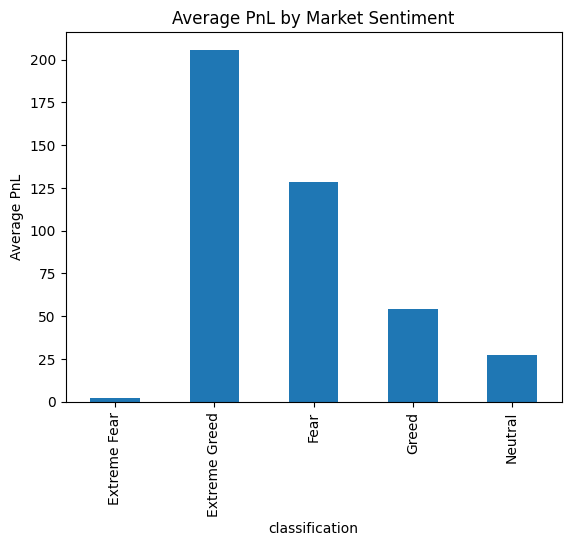

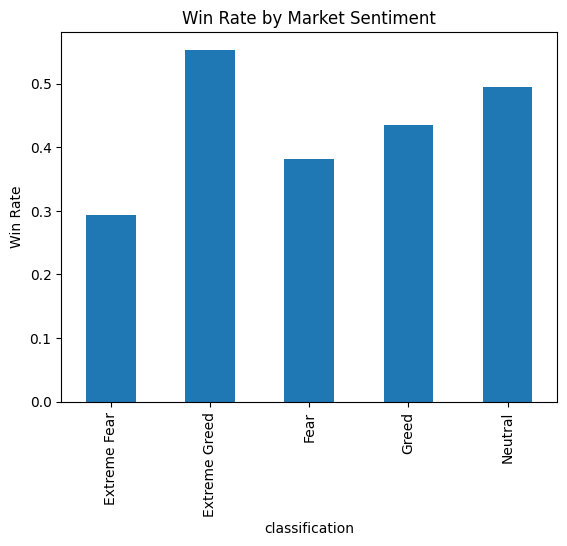

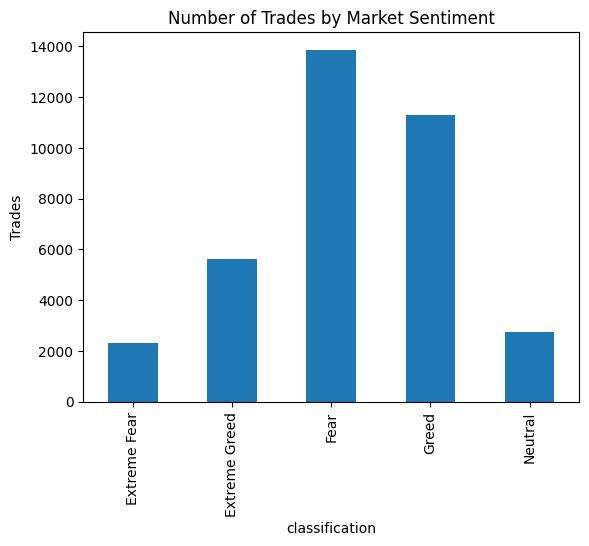

In [146]:
import matplotlib.pyplot as plt

avg_pnl.plot(kind='bar', title='Average PnL by Market Sentiment')
plt.ylabel('Average PnL')
plt.show()

win_rate.plot(kind='bar', title='Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.show()

trade_count.plot(kind='bar', title='Number of Trades by Market Sentiment')
plt.ylabel('Trades')
plt.show()


In [147]:
data.groupby('classification')['Size USD'].mean()


,Size USD
classification,
Extreme Fear,4118.761840
Extreme Greed,3242.085086
Fear,5744.782685
Greed,5051.878829
Neutral,4332.202906


In [148]:
trader_freq = data.groupby('Account').size().reset_index(name='num_trades')

median_trades = trader_freq['num_trades'].median()

frequent_traders = trader_freq[trader_freq['num_trades'] > median_trades]
infrequent_traders = trader_freq[trader_freq['num_trades'] <= median_trades]

frequent_traders.shape, infrequent_traders.shape


((16, 2), (16, 2))

In [149]:
print("Frequent traders shape:", frequent_traders.shape)
print("Infrequent traders shape:", infrequent_traders.shape)


Frequent traders shape: (16, 2)
Infrequent traders shape: (16, 2)


In [150]:
frequent_traders.head(), infrequent_traders.head()


(                                       Account  num_trades
 0   0x083384f897ee0f19899168e3b1bec365f52a9012        3818
 1   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd        7280
 2   0x271b280974205ca63b716753467d5a371de622ab        3809
 3   0x28736f43f1e871e6aa8b1148d38d4994275d72c4       13311
 10  0x47add9a56df66b524d5e2c1993a43cde53b6ed85        8519,
                                       Account  num_trades
 4  0x2c229d22b100a7beb69122eed721cee9b24011dd        3239
 5  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891         815
 6  0x39cef799f8b69da1995852eea189df24eb5cae3c        3589
 7  0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6         332
 8  0x420ab45e0bd8863569a5efbb9c05d91f40624641         383)

In [151]:
print("Frequent traders count:", len(frequent_traders))
print("Infrequent traders count:", len(infrequent_traders))


Frequent traders count: 16
Infrequent traders count: 16


Segmented traders into frequent and infrequent based on median trade count


In [152]:
data = data.merge(trader_freq, on='Account', how='left')
data['segment'] = data['num_trades'].apply(
    lambda x: 'Frequent' if x > median_trades else 'Infrequent'
)
segment_perf = data.groupby(['segment', 'classification'])['Closed PnL'].mean()
segment_perf


segment     classification
Frequent    Extreme Fear        3.409301
            Extreme Greed     218.513526
            Fear              110.597331
            Greed              66.523277
            Neutral            27.688921
Infrequent  Extreme Fear       -8.126968
            Extreme Greed      80.731954
            Fear              307.192846
            Greed             -48.838021
            Neutral            10.460529
Name: Closed PnL, dtype: float64

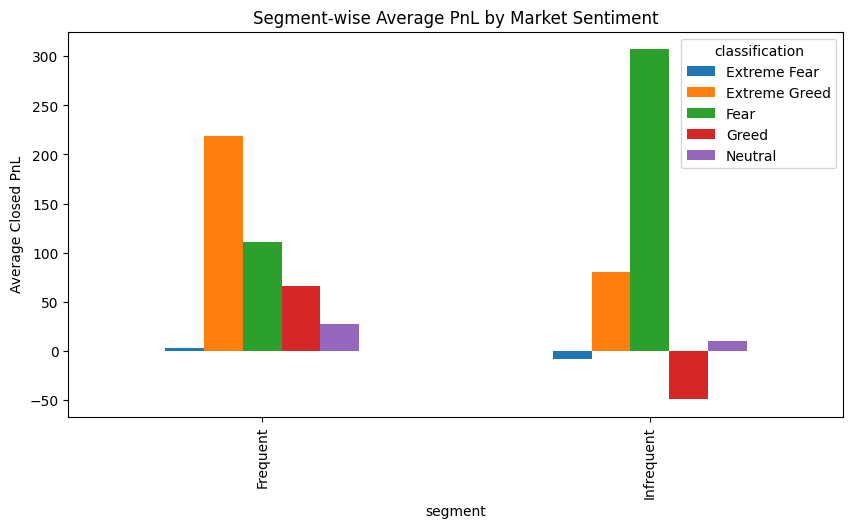

In [153]:
segment_perf.unstack().plot(kind='bar', figsize=(10,5))
plt.title("Segment-wise Average PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()


After mounting, your Drive files will be accessible under the `/content/drive` directory. You will then need to specify the full path to your CSV files (e.g., `/content/drive/My Drive/YourFolder/bitcoin_sentiment.csv`).